In [105]:
import os
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn import linear_model
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score

(28800,)


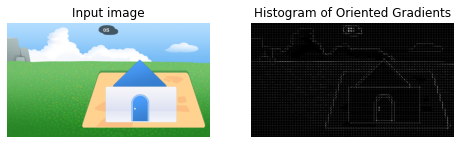

In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.feature import hog
from skimage import data, exposure


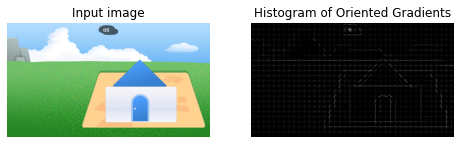

In [93]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.feature import hog
from skimage import data, exposure
image = imread('./wKgIb2CjYnCAP8DtAAUjHcaD3v4926.png')
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(64,64),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [94]:
def hog_house(img_path):
    image = imread(img_path)
    # print(type(image))
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(64, 64),
                    cells_per_block=(1,1), visualize=True, channel_axis=-1)
    return fd

In [103]:
if __name__ == '__main__':
    img = []
    labels = []
    name = ['house']
    # 标签
    label = {b'healthy':0, b'unhealthy':1}

    root = os.path.dirname(os.getcwd())
    print("root direction", root)

    dataset_class = os.listdir(root + '/Dataset')
    print(dataset_class)

    for sample_class in dataset_class:
        sample_class_path = root + '/Dataset' + '/' + sample_class
        # print(sample_class_path)
        sample_file = os.listdir(sample_class_path)
        # print(sample_file)

        for detail in sample_file:
            detail_path = sample_class_path + '/' + detail
            sample_detail = os.listdir(detail_path)
            print(detail_path)
            judge = 0
            for img_file in sample_detail:z
                if 'w' in img_file and '.png' in img_file and judge == 0:
                    judge = 1
                    house_path = detail_path + '/' + img_file
                    print(house_path)
                    # house_path = detail_path + '/' + img_file
                    fd = hog_house(house_path)
                    fd_len = len(fd)
                    fd.reshape(-1, 1)
                    landmarks = pd.DataFrame(columns=name, data=fd)
            # print(landmarks)
            # print(face_x)
                    landmarks.to_csv(detail_path + '/house.csv', encoding='gbk')
                # elif judge == 1 and  'w' in img_file and '.png' in img_file:
                #     house_path = detail_path + '/' + img_file
                #     print("delete", house_path)
                    # os.remove(house_path)
            if judge == 0:
                fd = np.zeros((fd_len,)) 
                landmarks = pd.DataFrame(columns=name, data=fd)
            # print(landmarks)
            # print(face_x)
                landmarks.to_csv(detail_path + '/house.csv', encoding='gbk')
            # print(sample_detail)
                
       

root direction f:\Project\AMH
['healthy', 'unhealthy']
f:\Project\AMH/Dataset/healthy/00002-0101
f:\Project\AMH/Dataset/healthy/00002-0101/wKgIb2CiGaSAAvXmAAURq3v7EsU439.png
f:\Project\AMH/Dataset/healthy/00002-0102
f:\Project\AMH/Dataset/healthy/00002-0102/wKgIb2CiGemAFnefAASUh-pvlNs790.png
f:\Project\AMH/Dataset/healthy/00002-0103
f:\Project\AMH/Dataset/healthy/00002-0103/wKgIb2Ch5u2APploAAUvgG1iwTs429.png
f:\Project\AMH/Dataset/healthy/00002-0105
f:\Project\AMH/Dataset/healthy/00002-0105/wKgIb2CiGJuAYLlxAATfpYJx6AQ673.png
f:\Project\AMH/Dataset/healthy/00002-0106
f:\Project\AMH/Dataset/healthy/00002-0106/wKgIb2ChzOGANwgUAAUBejclfuk924.png
f:\Project\AMH/Dataset/healthy/00002-0107
f:\Project\AMH/Dataset/healthy/00002-0107/wKgIb2CiHI6AUOZZAAVA7W50Spo189.png
f:\Project\AMH/Dataset/healthy/00002-0108
f:\Project\AMH/Dataset/healthy/00002-0108/wKgIb2CiHQKAGHuRAAUZjT4ZJ5Q952.png
f:\Project\AMH/Dataset/healthy/00002-0109
f:\Project\AMH/Dataset/healthy/00002-0109/wKgIb2CiHNiAPWG8AAT7QuJqSJM4

In [107]:
if __name__ == '__main__':
    img = []
    labels = []
    
    # 标签
    label = {b'healthy':0, b'unhealthy':1}

    root = os.path.dirname(os.getcwd())
    print("root direction", root)

    dataset_class = os.listdir(root + '/Dataset')
    print(dataset_class)

    for sample_class in dataset_class:
        sample_class_path = root + '/Dataset' + '/' + sample_class
        # print(sample_class_path)
        sample_file = os.listdir(sample_class_path)
        # print(sample_file)

        for detail in sample_file:
            detail_path = sample_class_path + '/' + detail
            sample_detail = os.listdir(detail_path)
            print(detail_path)
            judge = 0
            for img_file in sample_detail:
                
                if 'w' in img_file and '.png' in img_file:
                    house_path = detail_path + '/' + img_file
                    fd = hog_house(house_path)
                    img.append(fd)
                    fd_len = len(fd)
                    print(house_path)
                    print(fd.shape)
                    if sample_class == 'healthy':
                        labels.append(0)
                    elif sample_class == 'unhealthy':
                        labels.append(1)
                    judge = 1
                    break
                
            if judge == 0:
                    fd = np.zeros((fd_len,))
                    print("blank image")
                    print(fd.shape)
                    img.append(fd)
                    if sample_class == 'healthy':
                        labels.append(0)
                    elif sample_class == 'unhealthy':
                        labels.append(1)
                    
    print(np.array(labels).shape)                
    img = np.array(img).reshape(417, -1)
    print(img.shape)
       

root direction f:\Project\AMH
['healthy', 'unhealthy']
f:\Project\AMH/Dataset/healthy/00002-0101
f:\Project\AMH/Dataset/healthy/00002-0101/wKgIb2CiGaSAAvXmAAURq3v7EsU439.png
(1760,)
f:\Project\AMH/Dataset/healthy/00002-0102
f:\Project\AMH/Dataset/healthy/00002-0102/wKgIb2CiGemAFnefAASUh-pvlNs790.png
(1760,)
f:\Project\AMH/Dataset/healthy/00002-0103
f:\Project\AMH/Dataset/healthy/00002-0103/wKgIb2Ch5u2APploAAUvgG1iwTs429.png
(1760,)
f:\Project\AMH/Dataset/healthy/00002-0105
f:\Project\AMH/Dataset/healthy/00002-0105/wKgIb2CiGJuAYLlxAATfpYJx6AQ673.png
(1760,)
f:\Project\AMH/Dataset/healthy/00002-0106
f:\Project\AMH/Dataset/healthy/00002-0106/wKgIb2ChzOGANwgUAAUBejclfuk924.png
(1760,)
f:\Project\AMH/Dataset/healthy/00002-0107
f:\Project\AMH/Dataset/healthy/00002-0107/wKgIb2CiHI6AUOZZAAVA7W50Spo189.png
(1760,)
f:\Project\AMH/Dataset/healthy/00002-0108
f:\Project\AMH/Dataset/healthy/00002-0108/wKgIb2CiHQKAGHuRAAUZjT4ZJ5Q952.png
(1760,)
f:\Project\AMH/Dataset/healthy/00002-0109
f:\Project\AMH

In [109]:
skf = StratifiedKFold(n_splits=10)
img = np.array(img)
labels = np.array(labels)
sum_score = []
for train_index, test_index in skf.split(img, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = img[train_index], img[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
#     ros = RandomOverSampler(random_state=0)
#     x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
#     sm = SMOTE(random_state=0)
#     x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
#     ada = ADASYN(random_state=0)
#     x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
#     rus = RandomUnderSampler(random_state=0)
#     x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
#     smote_enn = SMOTEENN(random_state=0)
#     x_train_resampled, y_train_resampled  = smote_enn.fit_resample(x_train, y_train)
    # smote_tomek = SMOTETomek(random_state=0)
    # x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)
    # kernel = 'rbf'
    clf_rbf = svm.SVC(kernel='rbf', class_weight='balanced')
    # clf_rbf.fit(x_train_resampled, y_train_resampled)
    clf_rbf.fit(x_train, y_train)
    score_rbf = clf_rbf.score(x_test, y_test)
    y_predicted = clf_rbf.predict(x_test)
    print(y_predicted)
    print("The score of SVM RBF is : %f" % score_rbf)
    sum_score.append(score_rbf)
print("Max score:", np.max(sum_score))
print("Min score:", np.min(sum_score))
print("Avg score:", np.mean(sum_score))

[0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 1]
The score of SVM RBF is : 0.619048
[0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 0 0 0 0 1]
The score of SVM RBF is : 0.642857
[0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1
 0 1 0 0 1]
The score of SVM RBF is : 0.523810
[1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0
 0 0 1 1 0]
The score of SVM RBF is : 0.738095
[0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1
 1 1 0 0 1]
The score of SVM RBF is : 0.547619
[1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0
 0 0 1 1 0]
The score of SVM RBF is : 0.547619
[0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1
 0 0 1 0 0]
The score of SVM RBF is : 0.595238
[0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0
 1 0 0 0]
The score of SVM RBF is : 0.536585
[0 0 1 0 0 1 1 0 0 0 0 1 1

In [110]:
skf = StratifiedKFold(n_splits=10)
img = np.array(img)
labels = np.array(labels)
sum_score = []
for train_index, test_index in skf.split(img, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = img[train_index], img[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    # ros = RandomOverSampler(random_state=0)
    # x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
    # sm = SMOTE(random_state=0)
    # x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
    # ada = ADASYN(random_state=0)
    # x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
    # rus = RandomUnderSampler(random_state=0)
    # x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
#     smote_enn = SMOTEENN(random_state=0)
#     x_train_resampled, y_train_resampled  = smote_enn.fit_resample(x_train, y_train)
    # smote_tomek = SMOTETomek(random_state=0)
    # x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)
    # random forest
    RF_clf = RandomForestClassifier(random_state=0, class_weight='balanced')
    # RF_clf.fit(x_train_resampled, y_train_resampled)
    RF_clf.fit(x_train, y_train)
    score_RF = RF_clf.score(x_test, y_test)
    y_predicted = RF_clf.predict(x_test)
    print(y_predicted)
    print("The score of random forest is : %f" % score_RF)
    
    sum_score.append(score_RF)
print("Max score:", np.max(sum_score))
print("Min score:", np.min(sum_score))
print("Avg score:", np.mean(sum_score))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of random forest is : 0.785714
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of random forest is : 0.785714
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of random forest is : 0.761905
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of random forest is : 0.761905
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of random forest is : 0.761905
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of random forest is : 0.738095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of random forest is : 0.761905
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
The score of random

In [111]:
skf = StratifiedKFold(n_splits=10)
img = np.array(img)
labels = np.array(labels)
sum_score = []
for train_index, test_index in skf.split(img, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = img[train_index], img[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    # ros = RandomOverSampler(random_state=0)
    # x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
#     sm = SMOTE(random_state=0)
#     x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
#     ada = ADASYN(random_state=0)
#     x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
#     rus = RandomUnderSampler(random_state=0)
#     x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
#     smote_enn = SMOTEENN(random_state=0)
#     x_train_resampled, y_train_resampled  = smote_enn.fit_resample(x_train, y_train)
    # smote_tomek = SMOTETomek(random_state=0)
    # x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)
    # GBDT
    gbdt_clf = GradientBoostingClassifier(random_state=0)
    # gbdt_clf.fit(x_train_resampled, y_train_resampled)
    gbdt_clf.fit(x_train, y_train)
    score_gbdt = gbdt_clf.score(x_test, y_test)
    y_predicted = gbdt_clf.predict(x_test)
    print(y_predicted)
    print("The score of GBDT is : %f" % score_gbdt)
    
    sum_score.append(score_gbdt)
print("Max score:", np.max(sum_score))
print("Min score:", np.min(sum_score))
print("Avg score:", np.mean(sum_score))

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of GBDT is : 0.714286
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0]
The score of GBDT is : 0.809524
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0]
The score of GBDT is : 0.785714
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0]
The score of GBDT is : 0.785714
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of GBDT is : 0.738095
[0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0]
The score of GBDT is : 0.738095
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1]
The score of GBDT is : 0.761905
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 1 0 0]
The score of GBDT is : 0.731707
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0

In [78]:
skf = StratifiedKFold(n_splits=10)
img = np.array(img)
labels = np.array(labels)
sum_score = []
for train_index, test_index in skf.split(img, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = img[train_index], img[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
#     ros = RandomOverSampler(random_state=0)
#     x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
#     sm = SMOTE(random_state=0)
#     x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
#     ada = ADASYN(random_state=0)
#     x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
#     rus = RandomUnderSampler(random_state=0)
#     x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
#     smote_enn = SMOTEENN(random_state=0)
#     x_train_resampled, y_train_resampled  = smote_enn.fit_resample(x_train, y_train)
    # smote_tomek = SMOTETomek(random_state=0)
    # x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)
    # kernel = 'linear'
    clf_linear = svm.SVC(kernel='linear', class_weight='balanced')
    # clf_linear.fit(x_train_resampled, y_train_resampled)
    clf_linear.fit(x_train, y_train)
    score_linear = clf_linear.score(x_test, y_test)
    y_predicted = clf_linear.predict(x_test)
    print(y_predicted)
    print("The score of SVM linear is : %f" % score_linear)
    
    sum_score.append(score_linear)
print("Max score:", np.max(sum_score))
print("Min score:", np.min(sum_score))
print("Avg score:", np.mean(sum_score))

[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0]
The score of SVM linear is : 0.642857
[0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1]
The score of SVM linear is : 0.761905
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 0 0]
The score of SVM linear is : 0.690476
[1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1
 1 0 1 0 0]
The score of SVM linear is : 0.571429
[1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0]
The score of SVM linear is : 0.642857
[0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 0 0 1 0 0]
The score of SVM linear is : 0.619048
[0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1
 0 0 0 0 0]
The score of SVM linear is : 0.595238
[0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0]
The score of SVM linear is : 0.585366
[0

In [72]:
skf = StratifiedKFold(n_splits=10)
img = np.array(img)
labels = np.array(labels)
sum_score = []
for train_index, test_index in skf.split(img, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = img[train_index], img[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
#     ros = RandomOverSampler(random_state=0)
#     x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
#     sm = SMOTE(random_state=0)
#     x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
#     ada = ADASYN(random_state=0)
#     x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
#     rus = RandomUnderSampler(random_state=0)
#     x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
#     smote_enn = SMOTEENN(random_state=0)
#     x_train_resampled, y_train_resampled  = smote_enn.fit_resample(x_train, y_train)
    # smote_tomek = SMOTETomek(random_state=0)
    # x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)
    # LR
    logreg = linear_model.LogisticRegression(max_iter=50000, random_state=0, solver='liblinear', class_weight='balanced' )
    logreg.fit(x_train, y_train)
    # logreg.fit(x_train_resampled, y_train_resampled)
    score_lr = logreg.score(x_test, y_test)
    y_predicted = logreg.predict(x_test)
    print(y_predicted)
    print("The score of LR is : %f" % score_lr)
    sum_score.append(score_lr)
    
print("Max score:", np.max(sum_score))
print("Min score:", np.min(sum_score))
print("Avg score:", np.mean(sum_score))

[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0]
The score of LR is : 0.571429
[0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 1 0 0 0 1]
The score of LR is : 0.690476
[1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 0]
The score of LR is : 0.595238
[1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 1 0 1 1 0]
The score of LR is : 0.690476
[1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1]
The score of LR is : 0.714286
[0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1
 0 0 1 0 0]
The score of LR is : 0.595238
[0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 0 0]
The score of LR is : 0.547619
[0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0]
The score of LR is : 0.560976
[0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0